In [1]:
import sys
sys.path.append('../')
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from tqdm.auto import tqdm  # for easy progress bar
import os
import scienceplots
from util import (get_trial_res, show_results, compare_results, plot_fullep_score, 
                  compare_unique_topologies, plot_unique_topologies_boxplot, compute_differences_plot,
                  plot_action_proportions, load_depth_data, compare_depths, plot_substation_configs, plot_unique_topos,
                  compare_step_results, compare_all_results, compare_all_step_results)
import json
# folder where the results are stored: 
#res_dir = "../../../../../surfdrive/Documents/Research/Result"
res_dir = "../result"
colors = [i for i in mcolors.TABLEAU_COLORS.keys()]

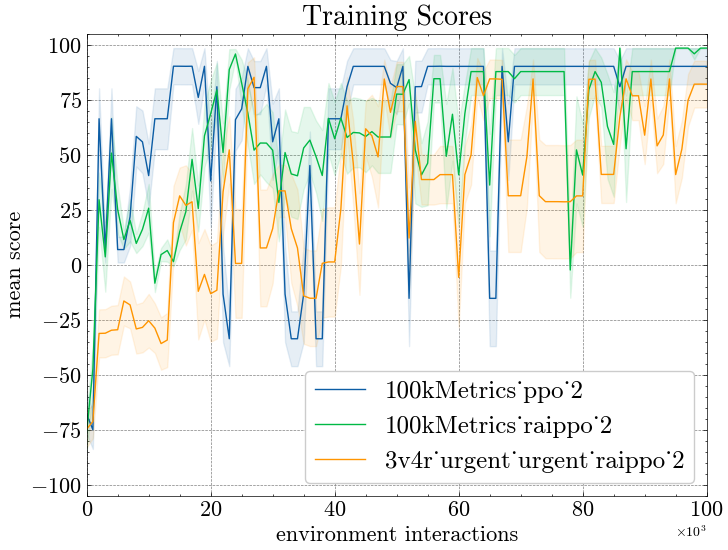

In [27]:
cases = [
    "100kMetrics_ppo_2",
    "100kMetrics_raippo_2",
    "3v4r_urgent_urgent_raippo_2",

    ]

scores = []
for case in cases:
    scores.append(pd.read_csv(f"{res_dir}/{case}/score.csv"))

figure = compare_results(cases, scores, style=['science', 'grid', 'no-latex'], nb_steps = 100_000)
figure.set_size_inches(8,6)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


File not found: ../result\100kMetrics_ppo_2/step.csv
File not found: ../result\100kMetrics_raippo_2/step.csv
File not found: ../result\3v4_urgent_urgent_raippo_2/step.csv
File not found: ../result\3k_urgent_raippo_2/step.csv
File not found: ../result\3kl_urgent_raippo_2/step.csv
File not found: ../result\4k_urgent_raippo_2/step.csv


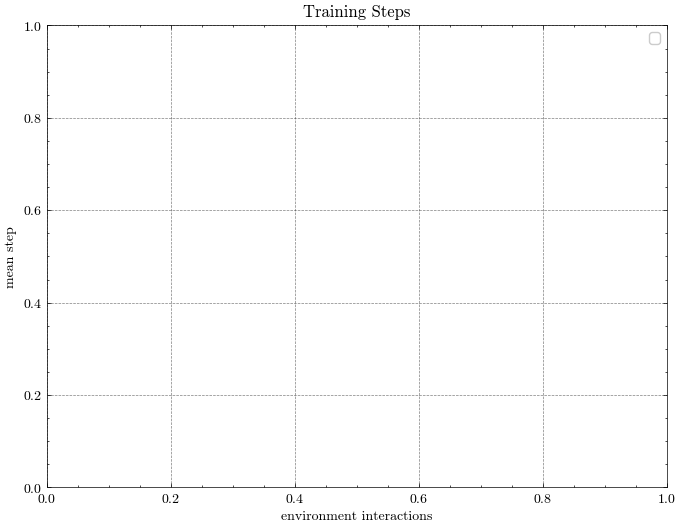

In [12]:
def read_step_files(dir_name, cases):
    steps = []
    for case in cases:
        step_path = os.path.join(dir_name, f"{case}/step.csv")
        if os.path.exists(step_path):
            step_data = pd.read_csv(step_path, header=None)
            steps.append(step_data)
        else:
            print(f"File not found: {step_path}")
    return steps

cases = ["100kMetrics_ppo_2",
    "100kMetrics_raippo_2",
    "3v4_urgent_urgent_raippo_2",
    "3k_urgent_raippo_2",
    "3kl_urgent_raippo_2",
    "4k_urgent_raippo_2",
]

# Read the step data
step_data = read_step_files(res_dir, cases)

# Generate the plot
figure = compare_step_results(cases, step_data, style=['science', 'grid', 'no-latex'], nb_steps=100_000)
figure.set_size_inches(8, 6)

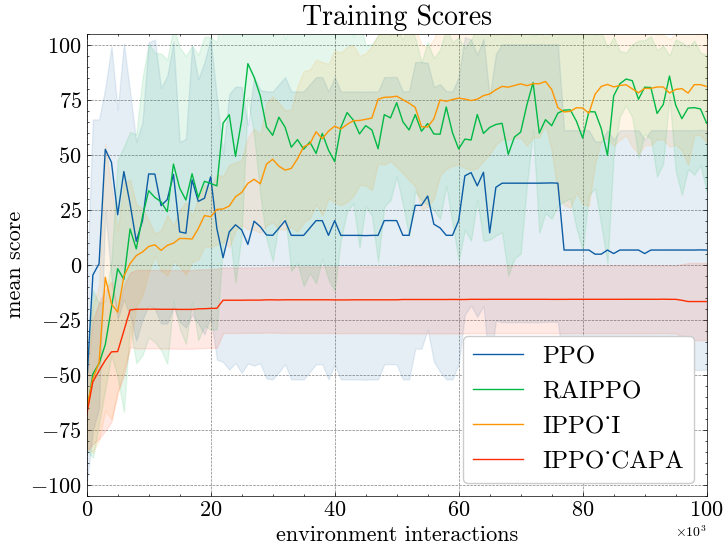

In [9]:
import glob

def read_all_seeds(res_dir, case_prefix):
    all_seed_data = []
    for seed_file in glob.glob(f"{res_dir}/{case_prefix}_*/score.csv"):
        seed_data = pd.read_csv(seed_file)
        seed_data = seed_data.rename(columns={seed_data.columns[0]: "env_interactions"})
        all_seed_data.append(seed_data)
    if all_seed_data:
        combined_data = pd.concat(all_seed_data)
        combined_data = combined_data.groupby("env_interactions").agg(['mean', 'std']).reset_index()
        combined_data.columns = ['_'.join(col).strip() for col in combined_data.columns.values]
        combined_data = combined_data.rename(columns={'env_interactions_': 'env_interactions'})
        return combined_data
    else:
        print(f"No data found for case prefix: {case_prefix}")
        return None

cases = [
    "case_14_ppo_ppo",
    "case_14_ippo_ippo",
    "case_14_ippo_i_raippo",
    #"case_14_ippo_inmediate_raippo",
    #"case_14_2k_hac_ac_prob",
    #"case_14_2k_hac_ac_cyclic",
    "case_14_2k_hac_ac_urgent",
    #"case_14_2k_hac_ac_random",
    #"case_14_2k_u_prob",
    #"case_14_2k_u_cyclic",
    #"case_14_2k_u_urgent",
    #"case_14_2k_u_random",
    #"case_14_3k_hac_ac_prob",
    #"case_14_3k_louvain_prob",
    #"case_14_4k_hac_ac_prob_raippo",
    #"case_14_4k_sc_ac_prob_raippo",
    #"random",
    #"cyclic",
    #"urgent",
    #"probabilistic",
    #"hac_a",
    #"hac_ac",
    #"sc_a",
    #"sc_ac",
    #"sc_ac",
    #"PPO",
    #"RAIPPO",
    #"IPPO_I",
    #"IPPO_CAPA"

]

scores = []
for case in cases:
    case_data = read_all_seeds(res_dir, case)
    if case_data is not None:
        scores.append(case_data)

figure = compare_all_results(cases, scores, style=['science', 'grid', 'no-latex'], nb_steps = 100_000)
figure.set_size_inches(8,6)

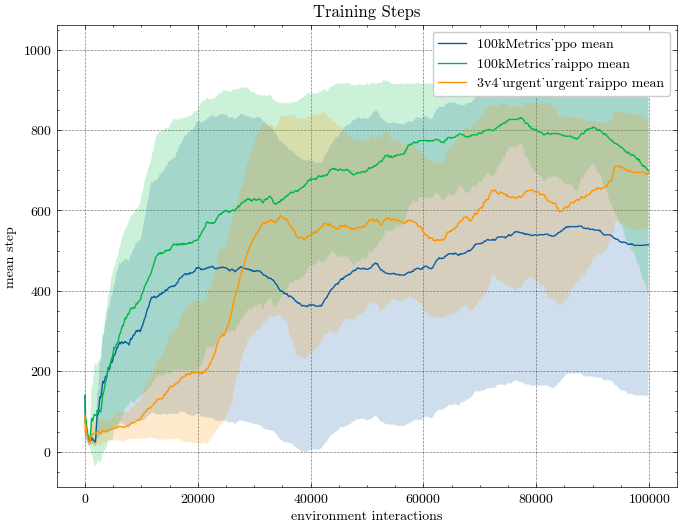

In [2]:
def read_all_step_files(dir_name, cases):
    all_steps = {}
    for case in cases:
        steps_list = []
        for seed_file in os.listdir(dir_name):
            if seed_file.startswith(case):
                step_path = os.path.join(dir_name, seed_file, "step.csv")
                if os.path.exists(step_path):
                    step_data = pd.read_csv(step_path, header=None)
                    steps_list.append(step_data)
                else:
                    print(f"File not found: {step_path}")
        if steps_list:
            all_steps[case] = steps_list
        else:
            print(f"No data found for case: {case}")
    return all_steps

cases = [
    "100kMetrics_ppo",
    "100kMetrics_raippo",
    "3v4_urgent_urgent_raippo",
]

# Read the step data
all_step_data = read_all_step_files(res_dir, cases)

# Generate the plot
figure = compare_all_step_results(cases, all_step_data, style=['science', 'grid', 'no-latex'], nb_steps=100_000)
figure.set_size_inches(8, 6)

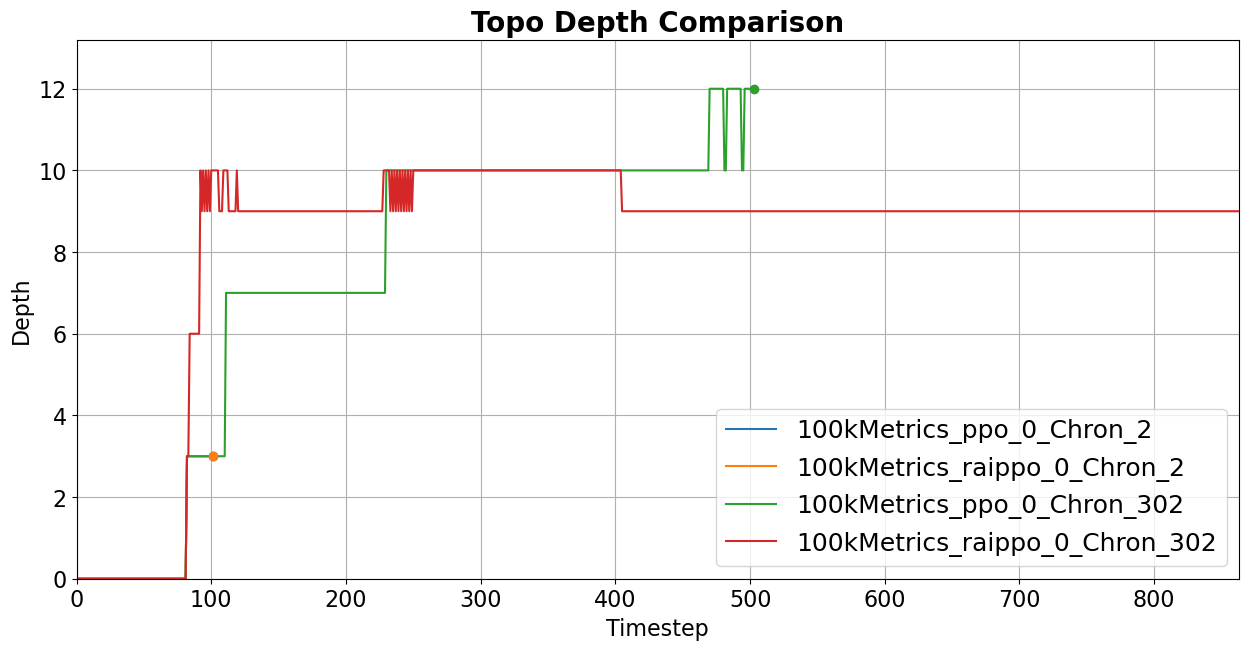

In [8]:
cases = ["100kMetrics_ppo_0", 
         "100kMetrics_raippo_0",
         ]

chronic_idx = [0,3] # int, list or "all"

depth_type = "elem" # elem or sub

compare_depths(res_dir, cases, chronic_idx, depth_type)

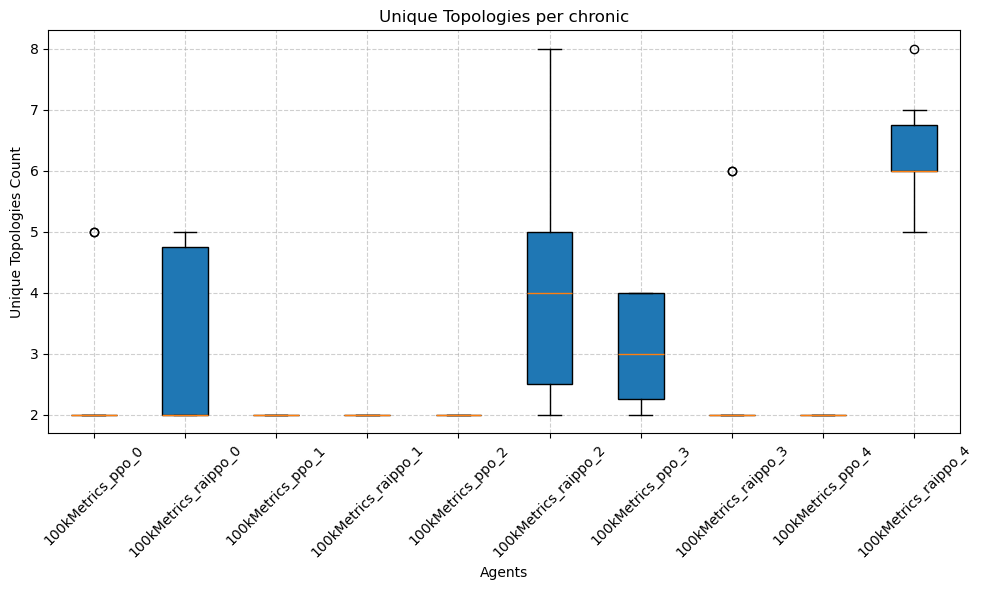

In [7]:
cases = [
    "100kMetrics_ppo_0",
    "100kMetrics_raippo_0",
    "100kMetrics_ppo_1",
    "100kMetrics_raippo_1",
    "100kMetrics_ppo_2",
    "100kMetrics_raippo_2",
    "100kMetrics_ppo_3",
    "100kMetrics_raippo_3",
    "100kMetrics_ppo_4",
    "100kMetrics_raippo_4",
    ]

# Generate and display the comparison plot
fig = plot_unique_topologies_boxplot(cases, res_dir)
plt.show()

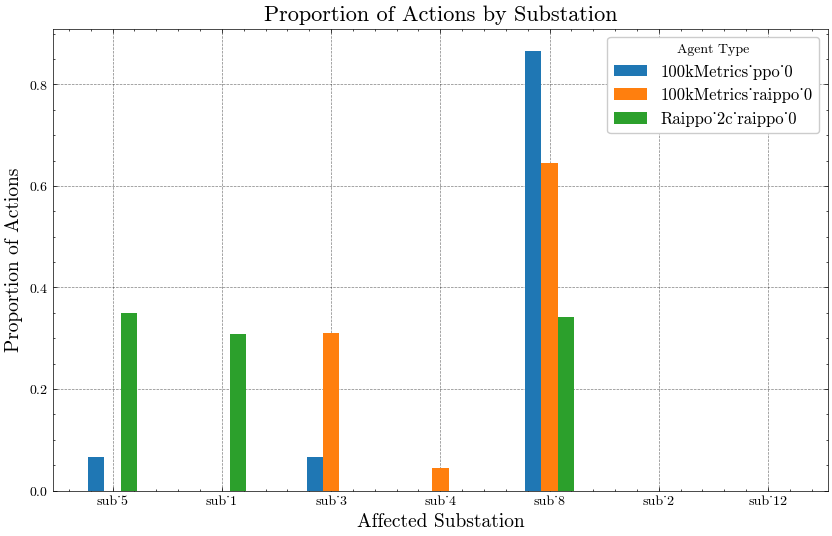

In [9]:
cases = ["100kMetrics_ppo_0",
         "100kMetrics_raippo_0",
         "Raippo_2c_raippo_0"]


plot_action_proportions(res_dir, cases)

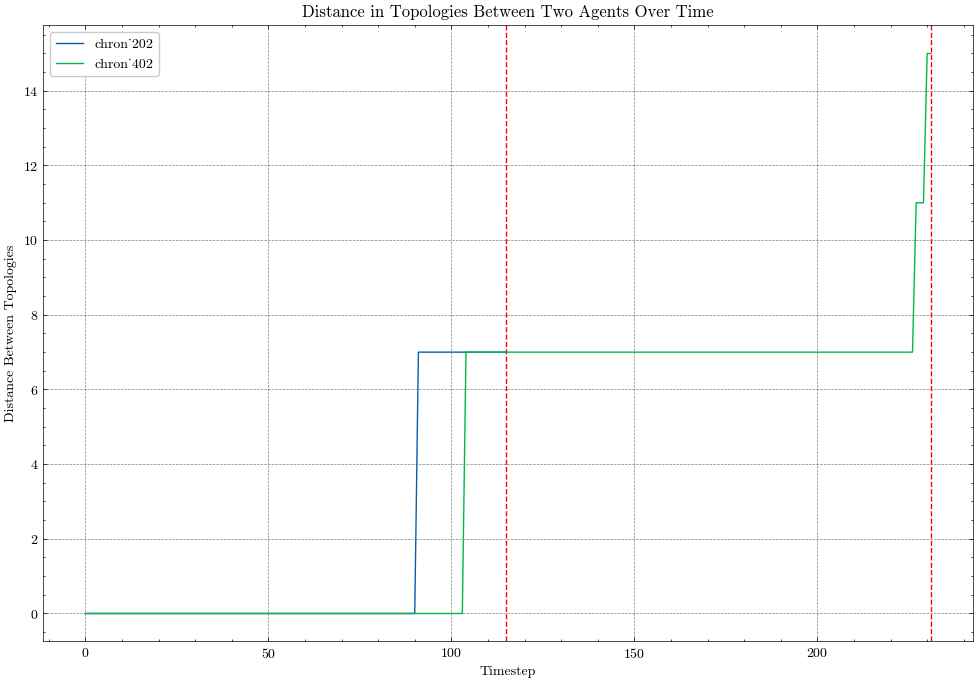

For chron_202, 100kMetrics_raippo_0 failed first at timestep 116.
For chron_402, Raippo_2c_raippo_0 failed first at timestep 232.


In [12]:
cases = ["Raippo_2c_raippo_0",
         "100kMetrics_raippo_0",]

# Optional: select any subset of chronics for comparison. The IDs are the indices of the chronix in the list of evaluated chronics
# Default: all of them. In our case they range from 0 to 9.
selected_chronix = [2,4]

compute_differences_plot(res_dir, cases, selected_chronix
                         )

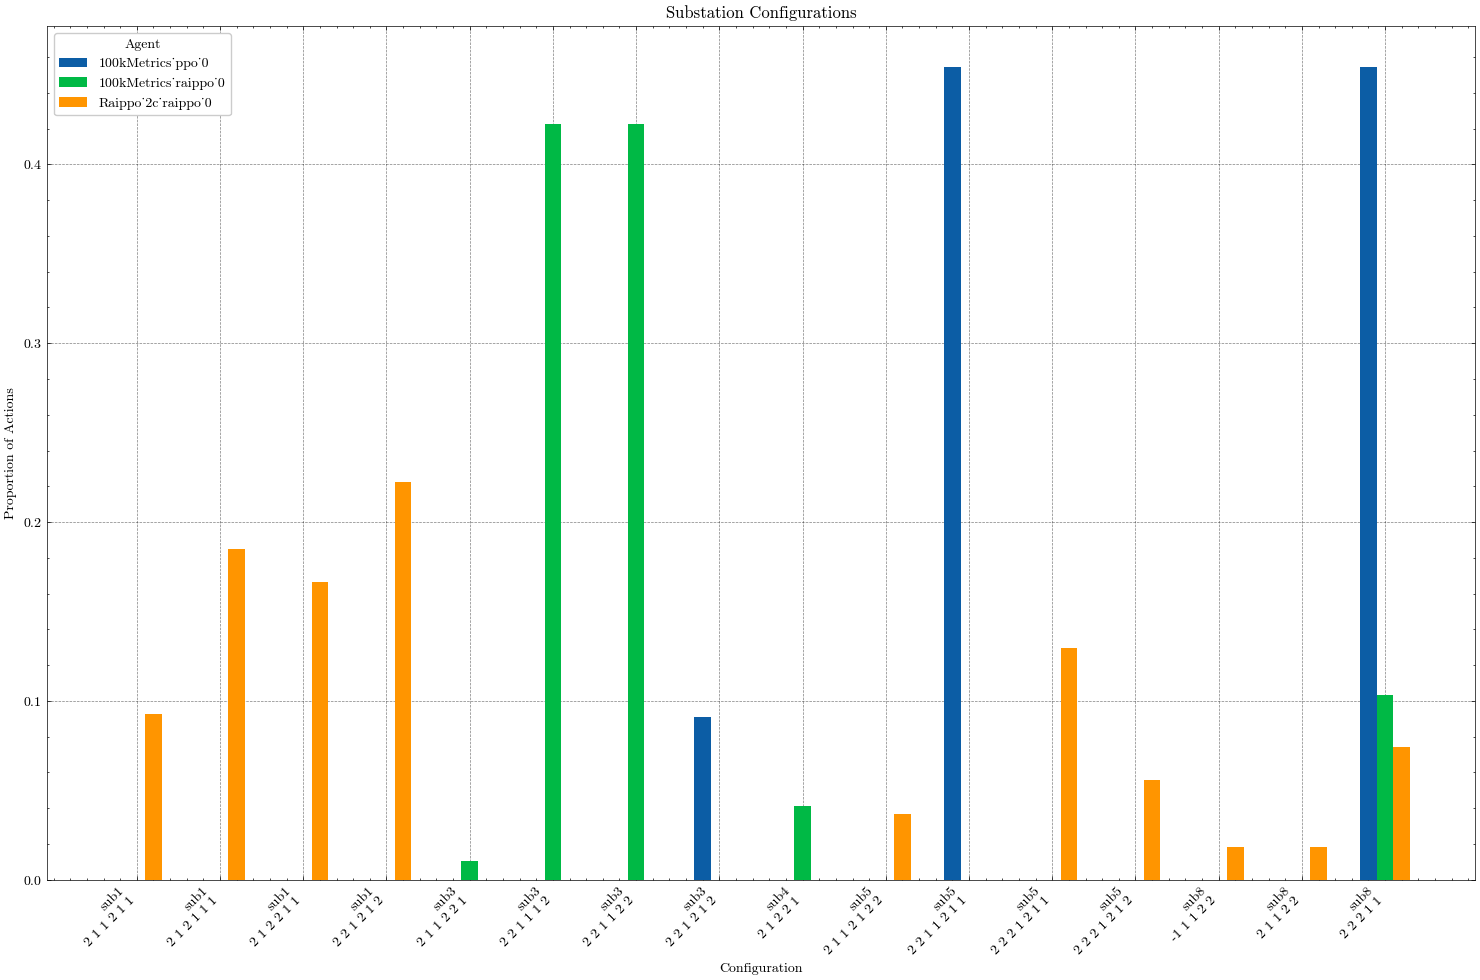

In [11]:
cases = ["100kMetrics_ppo_0",
        "100kMetrics_raippo_0",
        "Raippo_2c_raippo_0",
        ]


# Plot substation configurations
plot_substation_configs(res_dir, cases)

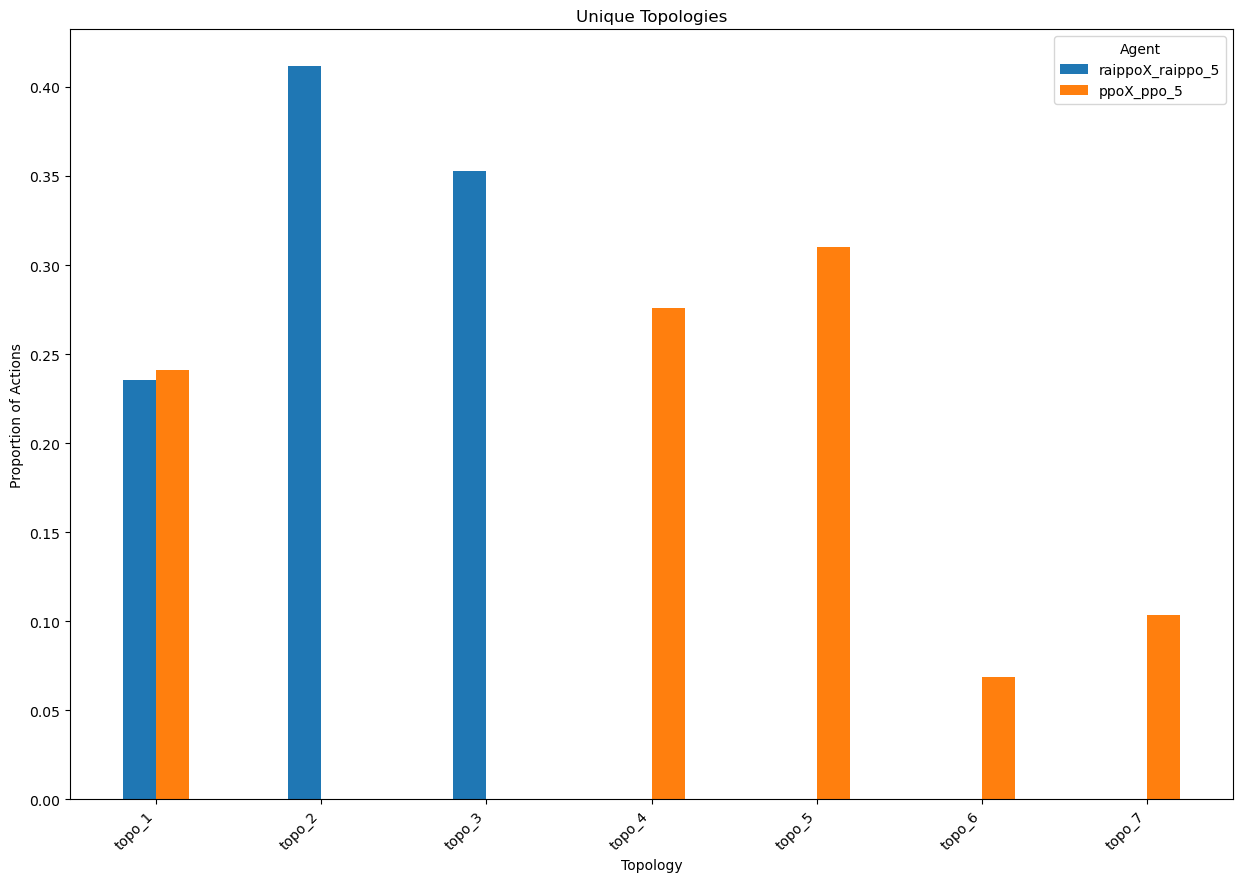

In [2]:
cases = ["raippoX_raippo_5",
         "ppoX_ppo_5",
         ]

# Plot unique topologies
plot_unique_topos(res_dir, cases)